In [68]:
# Importamos los necesario para trabajar
import csv
import matplotlib.pyplot as plt
from random import randint as num_azar
from copy import copy
from functools import total_ordering
from string import ascii_letters, digits
from math import ceil

In [69]:
def obtener_numero(dato):
    try:
        mayor = int(dato)
    except:
        try:
            mayor = ord(dato)
        except:
            try:
                temp = 0
                for c in dato:
                    temp += ord(c)
                mayor = temp
            except:
                try:
                    return obtener_numero(dato.valor_caracteristico())
                except:
                    try:
                        cadena = str(dato)
                        return obtener_numero(cadena)
                    except:
                        raise TypeError
    return mayor

In [70]:
# Definimos el algoritmo de ordenamiento con el que vamos a trabajar
cont = 0
def intercambia(A,x,y): #---->C 
    global cont 
    cont = cont + 1
    tmp = A[x]
    A[x] = A[y]
    A[y] = tmp
def obtenerMedio(A,p,r):
    global cont
    prom = 0
    for i in A[p : r + 1]:
        cont = cont + 1
        prom = prom + obtener_numero(i) #obtener numero()"""
    prom = prom // len( A[p : r + 1])
    
    ant = None
    pos = 0
    for i in range(len(A[p : r + 1])):
        cont = cont + 1
        act = prom - obtener_numero(A[i+p])#"""obtener numero()"""
        if(ant == None or ant > abs(act)):
            ant = abs(act)
            pos = i+p
    return pos
    
def Particionar(A,p,r):
    global cont
    """
    Aquì hay que poner obtener el medio
    y =  A.index(np.percentile(A[p:r],50,interpolation='nearest')) #n por la api
    """ 
    #if(p == 0 and r == len(A)-1):
    y = obtenerMedio(A,p,r)
    intercambia(A,y,r) #n
    x=A[r] #C
    i=p-1 #C
    for j in range(p,r): #n
        if (obtener_numero(A[j])<=obtener_numero(x)): #C
            i=i+1 #C
            intercambia(A,i,j) #C
        cont = cont + 1 #C
    intercambia(A,i+1,r) #C
    return i+1 #C

# Por lo tanto es n + n
# Particionar = n

def QuickSortHector(A,p,r): 
    global cont
    if( p<r ): #C
        q=Particionar(A,p,r) #n
        QuickSortHector(A,p,q-1)# por la separación es log(n)
        QuickSortHector(A,q+1,r)# por la separación es log(n)
    cont = cont + 1
    
def QuickSortHectorb(arreglo):
    global tiempo
    global cont
    cont = 0
    QuickSortHector(arreglo,0,len(arreglo) - 1)
    tiempo += cont
    return cont


In [71]:
#Algoritmo quick original
def partition(arr,low,high):
    global tiempo
    tiempo += 1
    i = ( low-1 )         # index of smaller element
    pivot = arr[high]     # pivot
    for j in range(low , high):
        tiempo += 1
        # If current element is smaller than or
        # equal to pivot
        if   obtener_numero(arr[j]) <= obtener_numero(pivot):
         
            # increment index of smaller element
            i = i+1
            arr[i],arr[j] = arr[j],arr[i]
 
    arr[i+1],arr[high] = arr[high],arr[i+1]
    return ( i+1 )
 
def quickSort(arr,low,high):
    global tiempo
    tiempo += 1
    if low < high:
        pi = partition(arr,low,high)
        quickSort(arr, low, pi-1)
        quickSort(arr, pi+1, high)

def QuickSort(A):
    global tiempo
    quickSort(A,0,len(A)-1)
    return tiempo


In [72]:
entro = 0
def DoubleQuickSort(arreglo):
    global tiempo
    contdir = 0
    continv = 0
    for i in range(1,len(arreglo)):
        tiempo+=1
        if(arreglo[i-1]<=arreglo[i]):
            contdir+=1
            
    if(contdir==len(arreglo)-1):
        #print("entro")
        return
    #else:
     #   print(contdir,"contador")
      #  print(len(arreglo)-1)
    
    for i in range(1,len(arreglo)):
        tiempo+=1
        if(arreglo[i-1]>=arreglo[i]):
            continv+=1
            
    if(continv == len(arreglo)-1):
        for i in range(0,ceil(len(arreglo)/2)):
            tiempo+=1
            aux = arreglo[i]
            arreglo[i] = arreglo[len(arreglo) - 1 - i]
            arreglo[len(arreglo) - 1-i] = aux
        return
    cerc = 1.6 ##Nos dirá que tanto se aproximará a el valor esperado
    if(continv >= (len(arreglo)-1)//1.7 or contdir >= (len(arreglo)-1)//1.7):
        QuickSortHectorb(arreglo)
    else:
        QuickSort(arreglo)
    

In [73]:
def graficar(x,y,color,titulo):
    plt.plot(x,y,color)
    plt.ylabel("Iteraciones")
    plt.xlabel("Cantidad de Datos")
    plt.title(titulo)
    plt.show()
    
def graficar_chidori(titulo):
    plt.ylabel("Iteraciones")
    plt.xlabel("Cantidad de Datos")
    plt.title(titulo)
    plt.show()

def graficar_quick(x, y, color, titulo):
    #y = obtener_fila(y)
    plt.plot(x, y[0], "r")
    plt.plot(x, y[1], "g")
    plt.legend(('DoubleQuickSort', 'Quick Original'), prop = {'size':10}, loc = 'upper left')
    #plt.legend(('Caso Normal'), prop = {'size':10}, loc = 'upper left')
    graficar_chidori(titulo)

In [74]:
def probar_algoritmo(algoritmo, conjunto):
    global tiempo
    global cont
    tiempo = 0
    algoritmo(conjunto)
    return tiempo

In [75]:

def arregloAlAzar(numero):
    """
    Funcion que permite crear un arreglo de dimension numero con puros numeros al azar
    """
    arreglo=[]
    for i in range(numero):
        arreglo.append(num_azar(1, numero))
    return arreglo

QuickSort
[1, 1, 2, 4, 4, 4, 5, 5, 6, 6, 7, 7, 10, 11, 12, 13, 14, 15, 17, 20, 21, 29, 29, 31, 32, 32, 33, 34, 34, 35, 36, 42, 42, 42, 43, 44, 44, 44, 44, 45, 45, 45, 48, 49, 52, 52, 52, 53, 55, 56, 57, 57, 60, 62, 63, 64, 65, 65, 66, 67, 67, 70, 70, 71, 73, 74, 74, 75, 76, 76, 76, 77, 77, 77, 77, 79, 79, 80, 80, 83, 86, 88, 88, 89, 90, 93, 97, 97, 98, 98, 99, 99, 102, 103, 103, 105, 106, 109, 110, 112, 112, 114, 116, 117, 118, 118, 120, 121, 121, 123, 124, 127, 127, 128, 132, 135, 135, 139, 139, 140, 140, 141, 142, 143, 143, 144, 145, 146, 146, 147, 148, 149, 149, 150, 151, 153, 154, 154, 154, 154, 155, 158, 158, 158, 158, 158, 159, 159, 160, 163, 165, 165, 167, 169, 169, 169, 171, 172, 174, 174, 175, 176, 176, 177, 177, 177, 179, 180, 180, 181, 181, 182, 182, 183, 184, 185, 185, 186, 186, 186, 188, 188, 190, 190, 191, 192, 192, 193, 193, 193, 194, 195, 196, 196, 198, 198, 199, 200, 201, 202, 203, 205, 205, 206, 206, 207, 207, 207, 209, 209, 211, 214, 215, 216, 216, 219, 222, 223, 223

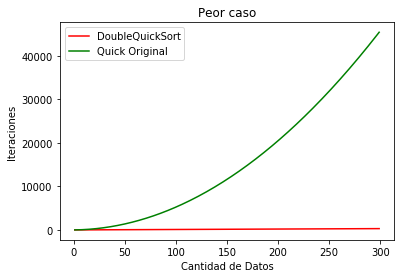

[35, 180, 249, 119, 295, 268, 219, 43, 233, 273, 186, 163, 46, 116, 31, 229, 34, 102, 47, 282, 55, 261, 94, 24, 78, 53, 174, 229, 288, 171, 103, 261, 245, 235, 169, 267, 180, 178, 42, 176, 183, 249, 234, 106, 161, 39, 275, 205, 103, 39, 198, 42, 208, 42, 113, 175, 224, 95, 125, 259, 30, 176, 156, 268, 188, 184, 267, 247, 293, 175, 91, 140, 17, 265, 148, 32, 60, 89, 121, 26, 219, 177, 249, 245, 101, 33, 16, 295, 292, 4, 290, 164, 160, 8, 100, 95, 80, 109, 75, 94, 84, 247, 221, 143, 256, 177, 222, 182, 85, 252, 90, 10, 92, 93, 230, 23, 152, 291, 71, 31, 33, 66, 116, 39, 229, 176, 72, 268, 52, 228, 94, 122, 151, 190, 159, 17, 175, 193, 286, 63, 194, 113, 98, 47, 53, 260, 39, 144, 25, 124, 126, 249, 185, 213, 100, 116, 217, 283, 219, 153, 7, 80, 116, 260, 105, 177, 221, 3, 45, 103, 268, 258, 146, 3, 127, 51, 241, 50, 177, 159, 259, 113, 33, 21, 133, 54, 177, 177, 296, 252, 214, 153, 196, 95, 212, 180, 286, 200, 50, 140, 56, 89, 123, 16, 26, 233, 78, 226, 74, 9, 264, 145, 168, 180, 4, 110, 

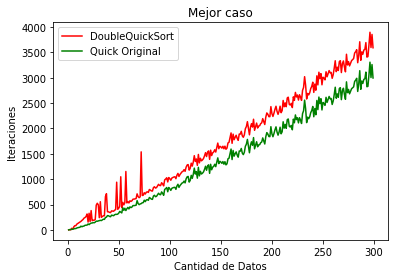

[118, 220, 232, 269, 144, 103, 60, 99, 185, 289, 105, 121, 184, 254, 269, 76, 212, 11, 3, 111, 144, 159, 204, 243, 269, 214, 48, 111, 271, 223, 174, 246, 227, 31, 106, 264, 69, 251, 38, 6, 110, 242, 117, 234, 208, 170, 45, 225, 186, 138, 255, 206, 120, 263, 91, 269, 89, 180, 84, 131, 187, 100, 94, 53, 149, 70, 90, 71, 80, 254, 184, 107, 291, 250, 164, 146, 222, 274, 264, 119, 18, 177, 60, 5, 228, 202, 173, 244, 212, 239, 163, 251, 234, 206, 237, 125, 120, 206, 212, 226, 70, 254, 27, 200, 27, 64, 290, 52, 265, 248, 101, 286, 292, 115, 184, 146, 91, 61, 298, 129, 174, 200, 280, 125, 102, 256, 98, 143, 33, 95, 127, 15, 98, 239, 106, 154, 141, 211, 259, 28, 23, 35, 93, 116, 62, 133, 85, 291, 36, 173, 207, 223, 62, 67, 108, 113, 69, 238, 291, 105, 222, 152, 258, 30, 54, 277, 253, 217, 285, 53, 16, 151, 102, 140, 9, 129, 62, 251, 164, 65, 3, 254, 2, 81, 250, 71, 31, 171, 255, 262, 294, 66, 85, 194, 92, 174, 258, 177, 8, 217, 230, 230, 191, 180, 14, 17, 131, 223, 4, 247, 129, 70, 180, 17, 240

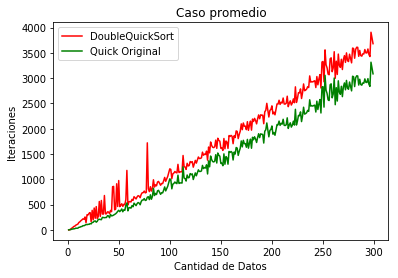

[298, 297, 297, 296, 296, 295, 295, 295, 293, 292, 288, 285, 284, 284, 282, 282, 280, 278, 276, 275, 275, 275, 274, 273, 271, 271, 270, 269, 269, 269, 268, 267, 267, 266, 266, 265, 265, 264, 264, 263, 262, 261, 260, 260, 259, 259, 256, 256, 256, 255, 254, 252, 251, 251, 250, 249, 249, 246, 246, 245, 245, 245, 240, 240, 240, 239, 239, 238, 238, 238, 235, 235, 234, 233, 233, 232, 231, 230, 227, 227, 227, 224, 223, 221, 218, 217, 216, 216, 214, 213, 213, 213, 208, 208, 206, 206, 203, 203, 201, 201, 201, 200, 200, 197, 197, 196, 196, 195, 195, 194, 193, 193, 192, 192, 191, 191, 189, 188, 187, 186, 186, 186, 185, 184, 183, 182, 181, 181, 178, 176, 176, 171, 171, 170, 169, 169, 167, 166, 166, 165, 165, 164, 164, 163, 162, 159, 158, 157, 157, 157, 157, 155, 155, 154, 154, 150, 149, 147, 146, 146, 145, 138, 138, 137, 136, 136, 135, 135, 133, 133, 132, 132, 130, 129, 129, 125, 125, 124, 123, 123, 123, 121, 119, 116, 116, 115, 115, 114, 114, 113, 110, 110, 109, 107, 107, 106, 106, 105, 105, 105,

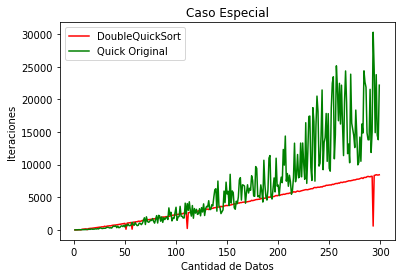

In [83]:
def comparacion(funcion, hector):
    """
    Funcion que permite evaluar distintas opciones a una funcion dada
    """
    color=("r","g","b","k")
    caso=("Peor caso","Mejor caso","Caso promedio","Caso Especial")
    print(funcion.__name__)
    tiempo=[]
    cantidad=[]
    for j in range(4):
        tiempo=[]
        cantidad=[]
        hector_t = []
        normal = []
        for i in range(1,300):
            azar=arregloAlAzar(i)
            if j == 0:#Peor caso
                azar.sort()    
            elif j == 1: #Mejor caso
                copia=copy(azar)
                azar.sort()
                azar.reverse()
                entero=int(float(len(azar)/2))
                numero=azar[entero]
                indice=copia.index(numero)
                #print("h:",obtenerMedio(azar, 0, len(azar) - 1), "-p:",indice)
                copia[len(copia)-1],copia[indice]=copia[indice],copia[len(copia)-1]
                azar=copia
            elif j == 3:
                
                azar.sort()
                azar.reverse()
                ##elemento a invertir
                invelm = num_azar(0,len(azar)-1)
                #invelm = 0
                #print(invelm)
                azar[len(azar)-1],azar[invelm]=azar[invelm],azar[len(azar)-1]
                if(i==299):
                    print(azar,"Lista desordenada","azar peor caso")
                    #print(entro)
            azarito = copy(azar)
            if(i==299):
                print(azarito,"Lista desordenada")
            tiempo2 = probar_algoritmo(hector,azarito)
            if(i==299):
                print(azarito,"Lista ordenada")
            hector_t.append(tiempo2)
            tiempo1=probar_algoritmo(funcion,azar)
            normal.append(tiempo1)
            tiempo = [hector_t, normal]
            cantidad.append(i)
        graficar_quick(cantidad, tiempo, color[j],caso[j])
        

comparacion(QuickSort, DoubleQuickSort)